In [845]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import streamlit as st

In [862]:
train_df=pd.read_csv("Titanic_train.csv")# Loading titanic training data set

In [863]:
test_df=pd.read_csv("Titanic_test.csv") # Loading titanic test data set

In [864]:
train_df.shape # Checking the shape of data set

(891, 12)

In [865]:
test_df.shape

(418, 11)

In [866]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [867]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [868]:
train_df.dtypes # Checking the data types of the data 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [869]:
# Extract title from Name
train_df["Title"] = train_df["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Check unique titles
print(train_df["Title"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [870]:
train_df["Title"].value_counts() # checking different types of titles

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [871]:
# replace the title 
train_df["Title"] = train_df["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

In [872]:
# Group rare ones
train_df["Title"] = train_df["Title"].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 
     'Dr','Major','Rev','Sir','Jonkheer'], 'Rare')

In [873]:
train_df["Title"].unique() 

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [874]:
# checking the null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [875]:
# dropping unnecessary columns
train_df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [876]:
# imputing the null values
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [877]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

In [878]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

<Axes: xlabel='Survived'>

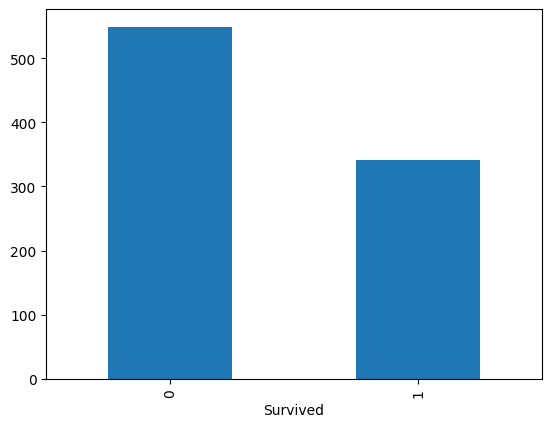

In [879]:
train_df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Sex'>

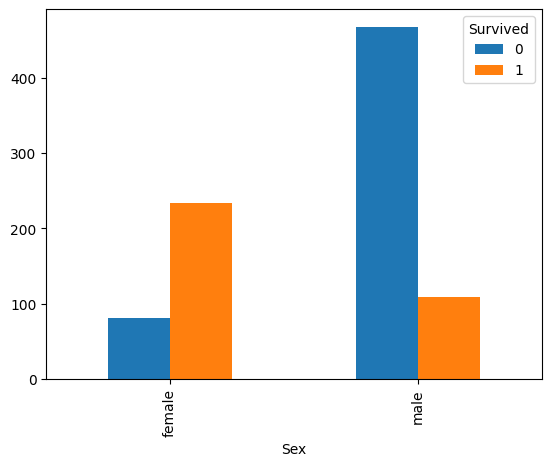

In [880]:
pd.crosstab(train_df['Sex'],train_df['Survived']).plot(kind='bar')

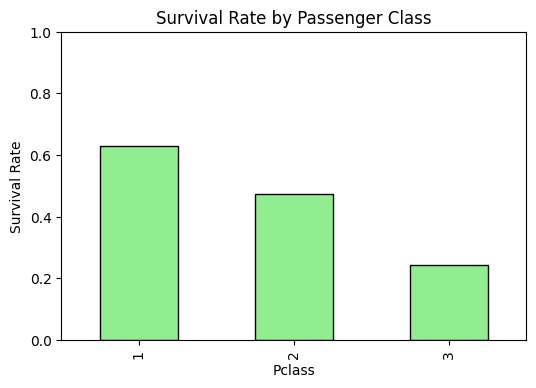

In [881]:
pclass_survival = train_df.groupby("Pclass")["Survived"].mean()
plt.figure(figsize=(6,4))
pclass_survival.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Pclass")
plt.ylim(0,1)
plt.show()

<Axes: xlabel='Pclass'>

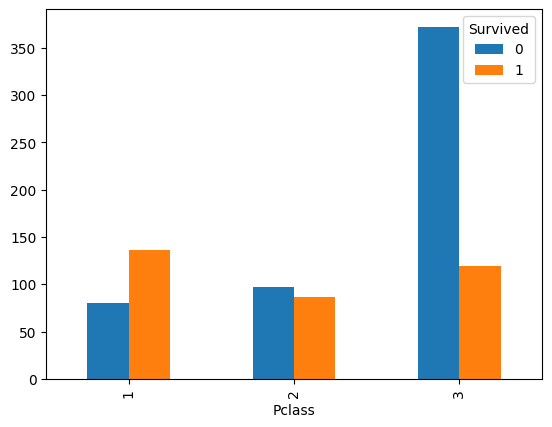

In [882]:
pd.crosstab(train_df['Pclass'],train_df['Survived']).plot(kind='bar')

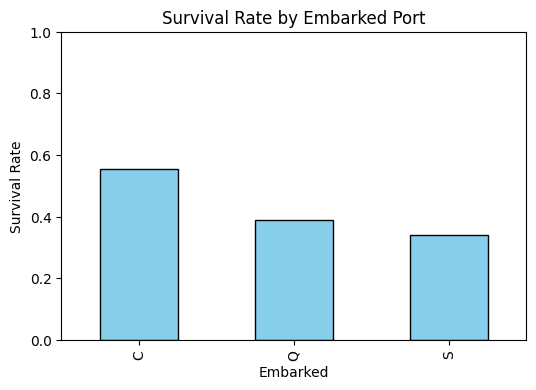

In [883]:
embarked_survival = train_df.groupby("Embarked")["Survived"].mean()
plt.figure(figsize=(6,4))
embarked_survival.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Survival Rate")
plt.xlabel("Embarked")
plt.ylim(0,1)
plt.show()


<Axes: xlabel='Embarked'>

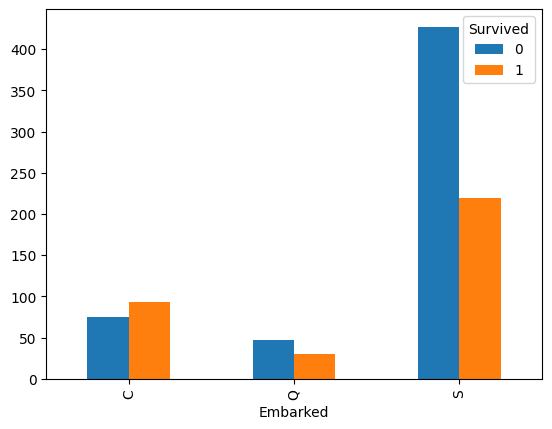

In [884]:
pd.crosstab(train_df['Embarked'],train_df['Survived']).plot(kind='bar')

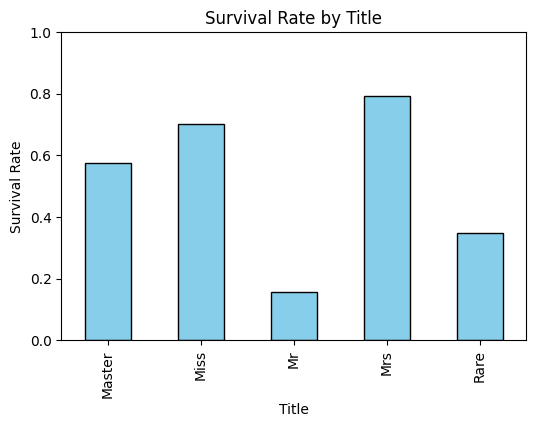

In [885]:
embarked_survival = train_df.groupby("Title")["Survived"].mean()
plt.figure(figsize=(6,4))
embarked_survival.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Survival Rate by Title")
plt.ylabel("Survival Rate")
plt.xlabel("Title")
plt.ylim(0,1)
plt.show()

<Axes: xlabel='Title'>

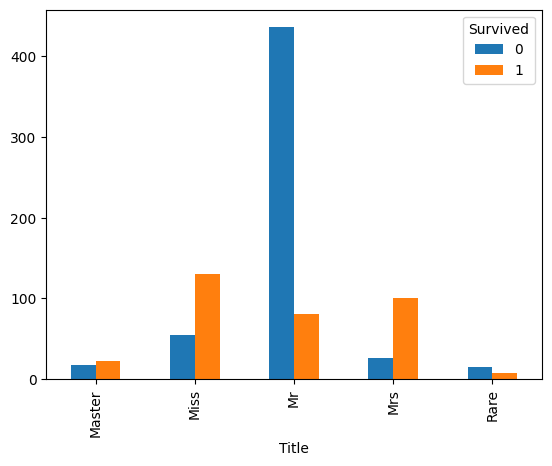

In [886]:
pd.crosstab(train_df['Title'],train_df['Survived']).plot(kind='bar')

In [888]:
train_df.describe() # statstical summary for numerical columns

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [889]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


In [890]:
# renaming the features
train_df=train_df.rename(columns={'SibSp':'Siblings_Spouse','Parch':'Parents_Children'})

In [785]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings_Spouse',
       'Parents_Children', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [891]:
# creating new feature from excisting features
train_df['Family_size']=train_df["Siblings_Spouse"] + train_df["Parents_Children"] + 1

In [892]:
train_df['Family_size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

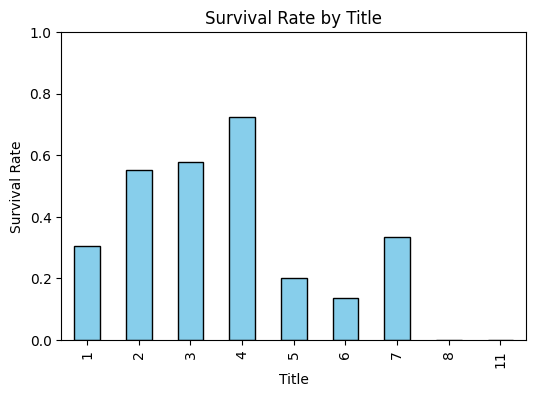

In [893]:
embarked_survival = train_df.groupby("Family_size")["Survived"].mean()
plt.figure(figsize=(6,4))
embarked_survival.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Survival Rate by Title")
plt.ylabel("Survival Rate")
plt.xlabel("Title")
plt.ylim(0,1)
plt.show()

Text(0.5, 0, 'Survived')

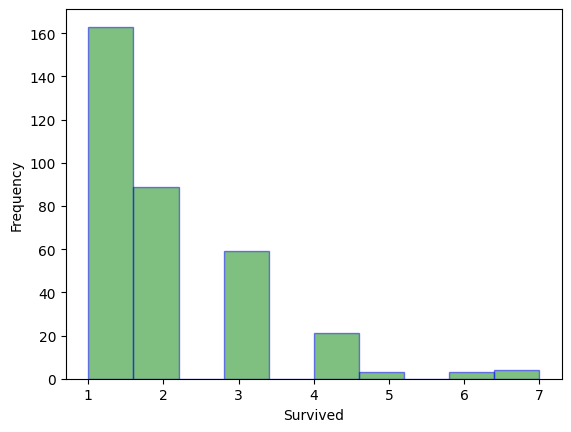

In [894]:
train_df[train_df['Survived']==1]['Family_size'].plot(kind='hist',bins=10,alpha=0.5,facecolor="green",edgecolor="blue")
plt.xlabel('Survived')

Text(0.5, 0, 'Not Survived')

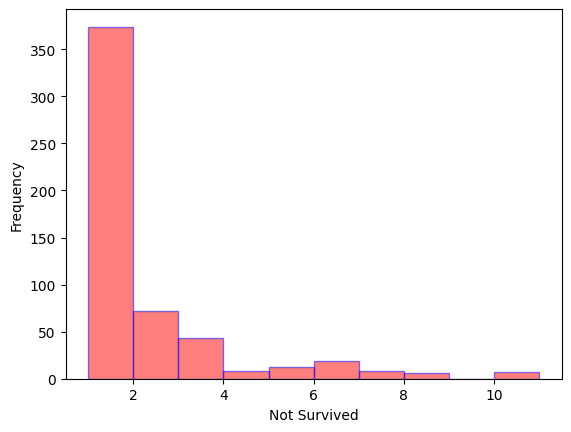

In [895]:
train_df[train_df['Survived']==0]['Family_size'].plot(kind='hist',bins=10,alpha=0.5,facecolor="red",edgecolor="blue")
plt.xlabel('Not Survived')

<Axes: xlabel='Pclass', ylabel='Fare'>

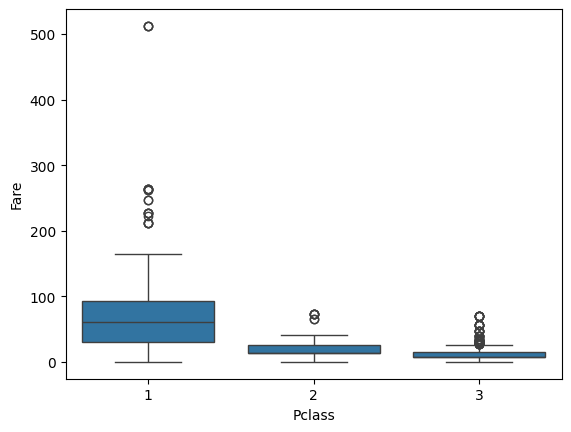

In [897]:
# checking the fare spread over each pclass
sns.boxplot(x='Pclass',y='Fare',data=train_df)

In [900]:
# checking the relation b/w the fare and pclass
from scipy.stats import ttest_ind,f_oneway
high = train_df[train_df['Pclass'] == 1]['Fare']
mid= train_df[train_df['Pclass'] == 2]['Fare']
low=train_df[train_df['Pclass'] == 3]['Fare']
f_stat, p = f_oneway(high,mid,low)
print("f-statistic:", f_stat)# the pclass and fare highly relaed so we can drop any of one column
print("p-value:",p)

f-statistic: 242.34415651744814
p-value: 1.0313763209141171e-84


In [902]:
# checking the fare to survival relation
surv = train_df[train_df['Survived'] == 0]['Fare']
not_surv= train_df[train_df['Survived'] == 1]['Fare']
t_stat, p = ttest_ind(surv,not_surv)
print("t-statistic:", f_stat)# the survival and fare highly relaed as p<0.05
print("p-value:",p)

t-statistic: 242.34415651744814
p-value: 6.120189341924198e-15


In [904]:
# cheking age to survival relation
survive = train_df[train_df['Survived'] == 1]['Age']
not_survive= train_df[train_df['Survived'] == 0]['Age']
t_stat, p = ttest_ind(survive, not_survive,equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p)
# as age is not that much affect survival but it little much affect the survival as alpha is 10% 

t-statistic: -1.8966053920256696
p-value: 0.058309159977757444


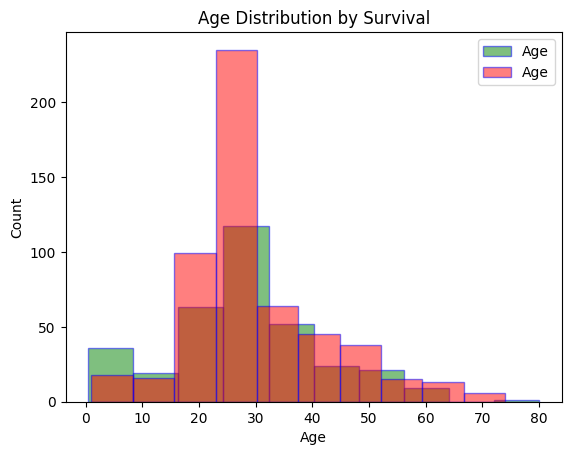

In [906]:
# histogramm th survival and age
train_df[train_df['Survived']==1]['Age'].plot(kind='hist',bins=10,alpha=0.5,facecolor="green",edgecolor="blue")
train_df[train_df['Survived']==0]['Age'].plot(kind='hist',bins=10,alpha=0.5,facecolor="red",edgecolor="blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

In [907]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings_Spouse',
       'Parents_Children', 'Fare', 'Cabin', 'Embarked', 'Title',
       'Family_size'],
      dtype='object')

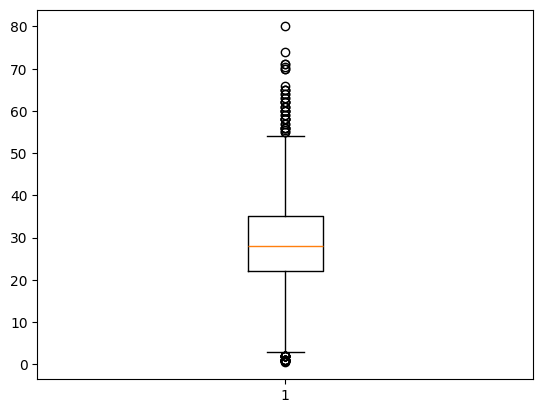

In [911]:
# Box plot for age 
age_box=plt.boxplot(train_df['Age'])

In [914]:
outliers=[]
for i in age_box['fliers']:
    outliers.append(i.get_ydata())
outliers
# here the outliers are natural as there is age can be max of 100 or more and have min od 0.1
# so we don't do any outlier treatment 

[array([ 2.  ,  2.  ,  0.83,  2.  ,  1.  ,  1.  ,  1.  ,  2.  ,  2.  ,
         0.92,  2.  ,  1.  ,  1.  ,  0.75,  2.  ,  2.  ,  2.  ,  0.75,
         0.67,  1.  ,  0.42,  2.  ,  1.  ,  0.83, 58.  , 55.  , 66.  ,
        65.  , 59.  , 71.  , 70.5 , 55.5 , 61.  , 56.  , 58.  , 59.  ,
        62.  , 58.  , 63.  , 65.  , 61.  , 60.  , 64.  , 65.  , 56.  ,
        63.  , 58.  , 55.  , 71.  , 64.  , 62.  , 62.  , 60.  , 61.  ,
        57.  , 80.  , 56.  , 58.  , 70.  , 60.  , 60.  , 70.  , 57.  ,
        62.  , 74.  , 56.  ])]

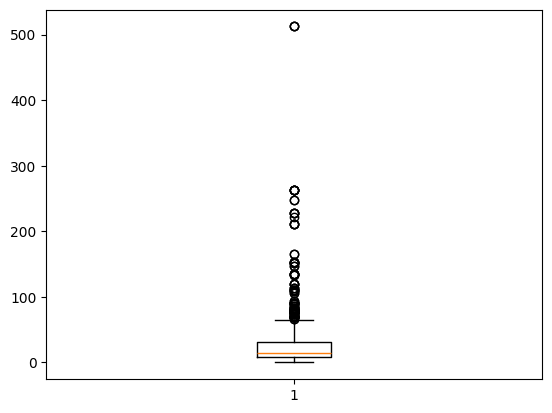

In [915]:
fare_box=plt.boxplot(train_df['Fare'])

In [916]:
for i in fare_box.items():
    print(i)

('whiskers', [<matplotlib.lines.Line2D object at 0x0000018E75ECD090>, <matplotlib.lines.Line2D object at 0x0000018E75ECD1D0>])
('caps', [<matplotlib.lines.Line2D object at 0x0000018E75ECD310>, <matplotlib.lines.Line2D object at 0x0000018E75ECD450>])
('boxes', [<matplotlib.lines.Line2D object at 0x0000018E75ECCF50>])
('medians', [<matplotlib.lines.Line2D object at 0x0000018E75ECD590>])
('fliers', [<matplotlib.lines.Line2D object at 0x0000018E75ECD6D0>])
('means', [])


In [918]:
x=[]
for i in fare_box['fliers']:
    x.append(i.get_ydata())
x
# as same as age there is chance of having high fair and low fair

[array([ 71.2833, 263.    , 146.5208,  82.1708,  76.7292,  80.    ,
         83.475 ,  73.5   , 263.    ,  77.2875, 247.5208,  73.5   ,
         77.2875,  79.2   ,  66.6   ,  69.55  ,  69.55  , 146.5208,
         69.55  , 113.275 ,  76.2917,  90.    ,  83.475 ,  90.    ,
         79.2   ,  86.5   , 512.3292,  79.65  , 153.4625, 135.6333,
         77.9583,  78.85  ,  91.0792, 151.55  , 247.5208, 151.55  ,
        110.8833, 108.9   ,  83.1583, 262.375 , 164.8667, 134.5   ,
         69.55  , 135.6333, 153.4625, 133.65  ,  66.6   , 134.5   ,
        263.    ,  75.25  ,  69.3   , 135.6333,  82.1708, 211.5   ,
        227.525 ,  73.5   , 120.    , 113.275 ,  90.    , 120.    ,
        263.    ,  81.8583,  89.1042,  91.0792,  90.    ,  78.2667,
        151.55  ,  86.5   , 108.9   ,  93.5   , 221.7792, 106.425 ,
         71.    , 106.425 , 110.8833, 227.525 ,  79.65  , 110.8833,
         79.65  ,  79.2   ,  78.2667, 153.4625,  77.9583,  69.3   ,
         76.7292,  73.5   , 113.275 , 133.65  , 

In [919]:
train_df1=train_df.drop(columns=['Pclass','Cabin']) # as pere here there are more than 70% data are null values in cabin so we drop the column
# and pclass is highly relatedd to fare so we drop pclass

In [920]:
train_df1

,Survived,Sex,Age,Siblings_Spouse,Parents_Children,Fare,Embarked,Title,Family_size
0,0,male,22.0,1,0,7.2500,S,Mr,2
1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1,female,26.0,0,0,7.9250,S,Miss,1
3,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,male,35.0,0,0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Rare,1
887,1,female,19.0,0,0,30.0000,S,Miss,1
888,0,female,28.0,1,2,23.4500,S,Miss,4
889,1,male,26.0,0,0,30.0000,C,Mr,1


In [921]:
encoded=pd.get_dummies(train_df[['Sex','Embarked','Title']],dtype=int)

In [922]:
encoded # the data is in object format so we encode the date 

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,1,0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,0,0,1
887,1,0,0,0,1,0,1,0,0,0
888,1,0,0,0,1,0,1,0,0,0
889,0,1,1,0,0,0,0,1,0,0


In [923]:
# combining the dataframe with encoded columns
train_df1 = pd.concat([train_df1.drop(['Sex','Embarked','Title'], axis=1), encoded], axis=1)


In [924]:
train_df1

,Survived,Age,Siblings_Spouse,Parents_Children,Fare,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,22.0,1,0,7.2500,2,0,1,0,0,1,0,0,1,0,0
1,1,38.0,1,0,71.2833,2,1,0,1,0,0,0,0,0,1,0
2,1,26.0,0,0,7.9250,1,1,0,0,0,1,0,1,0,0,0
3,1,35.0,1,0,53.1000,2,1,0,0,0,1,0,0,0,1,0
4,0,35.0,0,0,8.0500,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,0,1,0,0,0,0,1
887,1,19.0,0,0,30.0000,1,1,0,0,0,1,0,1,0,0,0
888,0,28.0,1,2,23.4500,4,1,0,0,0,1,0,1,0,0,0
889,1,26.0,0,0,30.0000,1,0,1,1,0,0,0,0,1,0,0


In [925]:
train_df['Siblings_Spouse'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [926]:
train_df['Parents_Children'].unique()

array([0, 1, 2, 5, 3, 4, 6])

<Axes: ylabel='Frequency'>

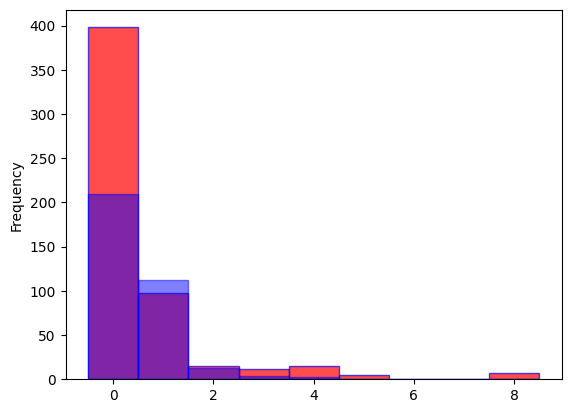

In [928]:
bins = np.arange(0, train_df['Siblings_Spouse'].max() + 1.5) - 0.5
train_df[train_df['Survived']==0]['Siblings_Spouse'].plot(kind='hist',bins=bins,alpha=0.7,facecolor="red",edgecolor="blue")
train_df[train_df['Survived']==1]['Siblings_Spouse'].plot(kind='hist',bins=bins,alpha=0.5,facecolor="blue",edgecolor="blue")
# Histogram for the survival vs sibling spouse

<Axes: ylabel='Frequency'>

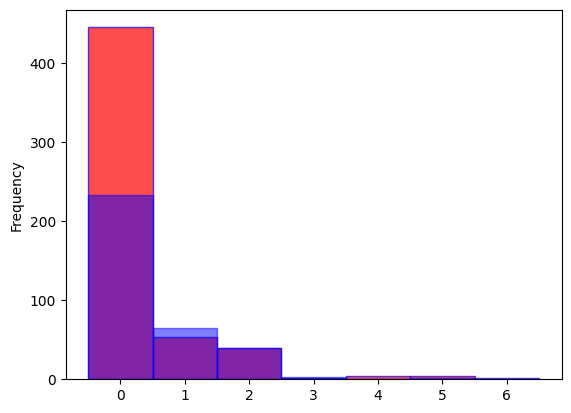

In [929]:
# histogram for survival vs oarents children
bins = np.arange(0, train_df['Parents_Children'].max() + 1.5) - 0.5
train_df[train_df['Survived']==0]['Parents_Children'].plot(kind='hist',bins=bins,alpha=0.7,facecolor="red",edgecolor="blue")
train_df[train_df['Survived']==1]['Parents_Children'].plot(kind='hist',bins=bins,alpha=0.5,facecolor="blue",edgecolor="blue")

In [930]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### Splitting data into training and testing

In [931]:
X=train_df1.drop(columns=['Survived','Siblings_Spouse','Parents_Children'])
Y=train_df['Survived']

In [932]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [933]:
X_train

,Age,Fare,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
661,40.0,7.2250,1,0,1,1,0,0,0,0,1,0,0
393,23.0,113.2750,2,1,0,1,0,0,0,1,0,0,0
266,16.0,39.6875,6,0,1,0,0,1,0,0,1,0,0
144,18.0,11.5000,1,0,1,0,0,1,0,0,1,0,0
446,13.0,19.5000,2,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,45.0,26.2500,3,1,0,0,0,1,0,0,0,1,0
165,9.0,20.5250,3,0,1,0,0,1,1,0,0,0,0
7,2.0,21.0750,5,0,1,0,0,1,1,0,0,0,0
219,30.0,10.5000,1,0,1,0,0,1,0,0,1,0,0


### Standardizing data 

In [934]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[['Age', 'Fare']] = sc.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = sc.fit_transform(X_test[['Age', 'Fare']])

### Model  Fitting

In [935]:
log_model=LogisticRegression()

In [936]:
log_model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [937]:
Y_pred=log_model.predict(X_test)

In [938]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8435754189944135

In [939]:
Y_train_pred=log_model.predict(X_train)
accuracy_score(Y_train,Y_train_pred)

0.827247191011236

In [940]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(log_model, X, Y, cv=5, scoring='accuracy')
print("CV Mean:", np.mean(scores))
print("CV Scores:", scores)

CV Mean: 0.8237900947837549
CV Scores: [0.82681564 0.8258427  0.79775281 0.80337079 0.86516854]


In [941]:
from sklearn.metrics import classification_report
report_dict = classification_report(Y_test, Y_pred, output_dict=True)
# Convert to DataFrame for neat alignment
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)

              precision    recall  f1-score     support
0              0.850467  0.883495  0.866667  103.000000
1              0.833333  0.789474  0.810811   76.000000
accuracy       0.843575  0.843575  0.843575    0.843575
macro avg      0.841900  0.836484  0.838739  179.000000
weighted avg   0.843193  0.843575  0.842951  179.000000


## ROC - AUC curve

The more area the curve covers the more accurate the model is.

ROC curve(AUC=0.84)


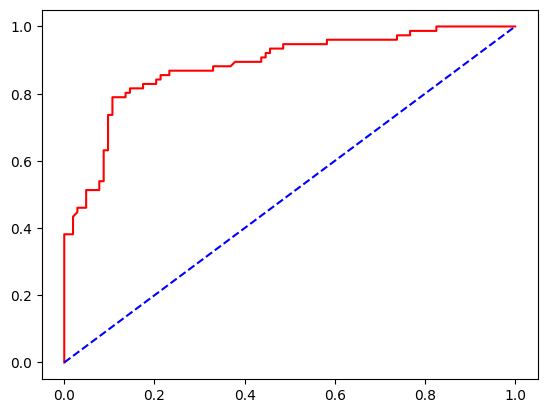

In [942]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(Y_test,log_model.predict_proba(X_test)[:,1])
auc=roc_auc_score(Y_test,Y_pred)
plt.plot(fpr,tpr,color='red',label=f'ROC curve(AUC={auc:.2f})')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
print(f'ROC curve(AUC={auc:.2f})')

### coefficients of the logistic regression model

In [943]:
coefficients = log_model.coef_[0]
features = X_train.columns

import numpy as np
for f, c in zip(features, coefficients):
    print(f"{f}: coef={c:.3f}, odds_ratio={np.exp(c):.3f}")

Age: coef=-0.089, odds_ratio=0.915
Fare: coef=0.619, odds_ratio=1.856
Family_size: coef=-0.485, odds_ratio=0.616
Sex_female: coef=0.852, odds_ratio=2.344
Sex_male: coef=-0.854, odds_ratio=0.426
Embarked_C: coef=0.396, odds_ratio=1.485
Embarked_Q: coef=-0.253, odds_ratio=0.777
Embarked_S: coef=-0.145, odds_ratio=0.865
Title_Master: coef=1.822, odds_ratio=6.182
Title_Miss: coef=-0.247, odds_ratio=0.782
Title_Mr: coef=-1.379, odds_ratio=0.252
Title_Mrs: coef=0.357, odds_ratio=1.429
Title_Rare: coef=-0.556, odds_ratio=0.574


### Interpretation of coefficents and significance of features

Each additional year reduces survival odds by ~14% (1–0.857).As age is less survival rate is more, Older passengers slightly less likely to survive.

Higher fare increases survival odds by ~86%. Likely wealthier passengers survived more.

Larger families reduce survival odds by ~36%. Possibly due to difficulty in saving all members.

Females had 2.3× higher survival odds than the baseline.

Being male reduces survival odds by ~51%. Females more likely to survive.

Passengers from Cherbourg had ~49% higher survival odds compared to the reference port. 

Passengers from Queenstown had lower survival odds (~43% less).there is less probbility of survival of passengers from Queenstown.

Passengers from Southampton had lower survival odds (~39% less) than reference port.

Passengers with "Master"(children) had 6× higher survival odds, likely due to priority for children.

Passengers with title "Miss" had lower odds (~42% less) relative to reference title.

"Mr" title strongly reduces survival odds (~92% less).

"Mrs" title slightly increases survival odds (~13% more).

Rare titles reduce survival odds (~74% less).

**Significance**

* Age: Weak (small effect, and age wasn’t as strong as sex/title).

* Fare:Strong (wealthier passengers had better survival chances).

* Family_size:Strong (clear negative impact).

* Sex_female:Very strong (matches “women and children first”).

* Embarked_C:Moderate (boarding location had some effect).

* Embarked_Q:Weak–moderate (not as strong as fare/sex/title).

* Embarked_S: Weak (small effect).

* Title_Master:Very strong (children prioritized for lifeboats).

* Title_Miss:Weak (effect present but small).

* Title_Mr:Very strong negative predictor.

* Title_Mrs:Moderate (being a married woman helped survival chances).

* Title_Rare:Moderate (less common roles, often men, were disadvantaged).

### test.csv 

In [944]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [945]:
# Extract title from Name
test_df["Title"] = test_df["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Check unique titles
print(test_df["Title"].unique())
test_df["Title"] = test_df["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
# Group rare ones
test_df["Title"] = test_df["Title"].replace(
    ['Lady', 'Countess','Capt', 'Col','Dona', 
     'Dr','Major','Rev','Sir','Jonkheer'], 'Rare')
print(test_df["Title"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [946]:
test_df1=test_df.drop(columns=['PassengerId','Name','Cabin','Ticket'])

In [947]:
test_df1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        0
dtype: int64

In [948]:
test_df1['Fare'].fillna(test_df1['Fare'].mean(),inplace=True)

In [949]:
test_df1['Age'].fillna(test_df1['Age'].mean(),inplace=True)

In [950]:
test_df1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [951]:
test_df1['Family_size']=test_df['SibSp']+test_df['Parch']+1

In [952]:
test_encoded=pd.get_dummies(test_df[['Sex','Embarked','Title']],dtype=int)
test_df1 = pd.concat([test_df1.drop(['Sex','Embarked','Title'], axis=1), test_encoded], axis=1)


In [953]:
test_df1.drop(columns=['Parch','SibSp','Pclass'],inplace=True)

In [954]:
test_df1

,Age,Fare,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,34.50000,7.8292,1,0,1,0,1,0,0,0,1,0,0
1,47.00000,7.0000,2,1,0,0,0,1,0,0,0,1,0
2,62.00000,9.6875,1,0,1,0,1,0,0,0,1,0,0
3,27.00000,8.6625,1,0,1,0,0,1,0,0,1,0,0
4,22.00000,12.2875,3,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,8.0500,1,0,1,0,0,1,0,0,1,0,0
414,39.00000,108.9000,1,1,0,1,0,0,0,0,0,0,1
415,38.50000,7.2500,1,0,1,0,0,1,0,0,1,0,0
416,30.27259,8.0500,1,0,1,0,0,1,0,0,1,0,0


In [955]:
y_test_predict=log_model.predict(test_df1)
y_test_predict = pd.Series(y_test_predict, index=test_df1.index, name="Predicted")

# Concatenate
test_data = pd.concat([test_df, y_test_predict], axis=1)

print(test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked Title  Predicted  
0  34.5      0      0   330911   7.8292   NaN        Q    Mr          1  
1  47.0      1      0   363272   7.0000   NaN        S   Mrs          1  
2  62.0      0      0   240276   9.6875   NaN        Q    Mr          0  
3  27.0      0      0   315154   8.6625   NaN        S    Mr          1  
4  22.0      1      1  3101298  12.2875   NaN        S   Mrs          1  


### saving the test data into csv file

In [956]:
test_data.to_csv("test_data.csv",index=False)

In [957]:
test_df1.head()

,Age,Fare,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,34.5,7.8292,1,0,1,0,1,0,0,0,1,0,0
1,47.0,7.0000,2,1,0,0,0,1,0,0,0,1,0
2,62.0,9.6875,1,0,1,0,1,0,0,0,1,0,0
3,27.0,8.6625,1,0,1,0,0,1,0,0,1,0,0
4,22.0,12.2875,3,1,0,0,0,1,0,0,0,1,0


# Saving the model into .pkl 

In [958]:
import joblib
# Save the trained logistic regression model
joblib.dump(log_model, "titanic_model.pkl")

['titanic_model.pkl']

# Deployment(Streamlit)  .py file 


import streamlit as st

**Load model**

model = joblib.load("titanic_model.pkl")

st.title("Titanic Survival Prediction (Logistic Regression)")

st.write("Enter passenger details to predict survival:")

**Input fields**

age = st.number_input("Age", min_value=0, max_value=100, value=29)

fare = st.number_input("Fare", min_value=0.0, value=80.0)

Siblings_Spouse= st.number_input("Siblings_Spouse", min_value=0, value=0)

Parents_Children=st.number_input("Parents_Children", min_value=0, value=0)

family_size=Siblings_Spouse+Parents_Children+1

sex = st.selectbox("Sex", ["Female", "Male"])

embarked = st.selectbox("Embarked", ["C", "Q", "S"])

title = st.selectbox("Title", ["Master", "Miss", "Mr", "Mrs", "Rare"])

**Encoding features manually**

sex_female, sex_male = (1, 0) if sex == "Female" else (0, 1)

embarked_C, embarked_Q, embarked_S = 0, 0, 0

if embarked == "C":

    embarked_C = 1
elif embarked == "Q":
    
    embarked_Q = 1

else:

    embarked_S = 1

title_Master, title_Miss, title_Mr, title_Mrs, title_Rare = 0, 0, 0, 0, 0

if title == "Master":

    title_Master = 1
elif title == "Miss":

    title_Miss = 1

elif title == "Mr":

    title_Mr = 1

elif title == "Mrs":

    title_Mrs = 1

else:

    title_Rare = 1

**Creating dataframe for prediction**

input_data = pd.DataFrame([{
    "Age": age,
    "Fare": fare,
    "Family_size": family_size,
    "Sex_female": sex_female,
    "Sex_male": sex_male,
    "Embarked_C": embarked_C,
    "Embarked_Q": embarked_Q,
    "Embarked_S": embarked_S,
    "Title_Master": title_Master,
    "Title_Miss": title_Miss,
    "Title_Mr": title_Mr,
    "Title_Mrs": title_Mrs,
    "Title_Rare": title_Rare,
}])

if st.button("Predict"):
  
    prediction = model.predict(input_data)[0]
    
    prob = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.success(f" Survived (Probability: {prob:.2f})")
    else:
        st.error(f"Did not survive (Probability: {prob:.2f})")


# Interview Quetions

1. What is the difference between precision and recall?
* Precision & Recall both are evalution metrics of classifications (especially in binary cassification)
* **Precision**:
  * Of all the instances predicted as Positive, how many are actually Positive.
  * Precisiom=TP/(TP+FP)
  * High precision then few false postives
  * It focuses on Quality of +ve predictions

* **Recall**:
  * Of all the actual Positive instances, how many did we correctly predict as Positive.
  * Recall=TP/(TP+FN)
  * High recall then few false negatives
  * It focuses on quantity of +ve predictions.
  
2. What is cross-validation, and why is it important in binary classification.
* Cross-validation is a resampling technique used to evaluate a model’s performance by splitting the dataset into multiple training and validation sets.
* most commonly used technique is K-Fold Cross-validation ,which divides data into k equal parts
  
* **Importance**
  * Prevents overfitting (model working well only on training data)
  * Provides a more reliable estimate of model performance than a single train-test split.
  * Ensures the model generalizes well to unseen data.
   